In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("Downloads/Housing_Prices.csv")

In [3]:
df1.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
df1.shape

(21613, 21)

In [5]:
df1['ID'].value_counts()

ID
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [6]:
df1.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [7]:
columns_to_keep = ['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'No of Floors', 'Condition of the House', 'Overall Grade', 'Age of House (in Years)', 'Lot Area after Renovation (in Sqft)']
df2 = df1[columns_to_keep]
df2.shape

(21613, 9)

In [8]:
df2.isnull().sum()

Sale Price                             4
No of Bedrooms                         0
No of Bathrooms                        4
Flat Area (in Sqft)                    9
No of Floors                           0
Condition of the House                 0
Overall Grade                          0
Age of House (in Years)                0
Lot Area after Renovation (in Sqft)    0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

Sale Price                             0
No of Bedrooms                         0
No of Bathrooms                        0
Flat Area (in Sqft)                    0
No of Floors                           0
Condition of the House                 0
Overall Grade                          0
Age of House (in Years)                0
Lot Area after Renovation (in Sqft)    0
dtype: int64

In [10]:
df3.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,1.0,Fair,7,63,5650
1,538000.0,3,2.25,2570.0,2.0,Fair,7,67,7639
2,180000.0,2,1.00,770.0,1.0,Fair,6,85,8062
3,604000.0,4,3.00,1960.0,1.0,Excellent,7,53,5000
4,510000.0,3,2.00,1680.0,1.0,Fair,8,31,7503


In [11]:
df3['No of Bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [12]:
df3['No of Bedrooms'].value_counts()

No of Bedrooms
3     9815
4     6877
2     2758
5     1601
6      271
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [13]:
df4 = df3[(df3['No of Bedrooms'] <= 6) & (df3['No of Bedrooms'] > 0)]
df4.shape

(21521, 9)

In [14]:
df4['Condition of the House'].value_counts()

Condition of the House
Fair         13968
Good          5660
Excellent     1693
Okay           171
Bad             29
Name: count, dtype: int64

In [15]:
df4['No of Bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 0.  , 5.25, 6.  , 0.5 ,
       5.5 , 5.75, 8.  , 6.75, 7.75, 6.25, 6.5 ])

In [16]:
df4 = df4[df4['No of Bathrooms'] >= 1]
df4['No of Bathrooms'] = df4['No of Bathrooms'].astype(int)
df4 = df4[df4['No of Bathrooms'] < 6]

In [17]:
df4['No of Bathrooms'].value_counts()

No of Bathrooms
2    10515
1     8345
3     2206
4      321
5       44
Name: count, dtype: int64

In [18]:
df4 = df4[(df4['No of Bedrooms'] <= 6) & (df4['No of Bedrooms'] > 0)]
df4.shape

(21431, 9)

In [19]:
df4 = df4[~(df4['Flat Area (in Sqft)'] / df4['No of Bedrooms'] < 300)]
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft)
0,221900.0,3,1,1180.0,1.0,Fair,7,63,5650
1,538000.0,3,2,2570.0,2.0,Fair,7,67,7639
2,180000.0,2,1,770.0,1.0,Fair,6,85,8062
3,604000.0,4,3,1960.0,1.0,Excellent,7,53,5000
4,510000.0,3,2,1680.0,1.0,Fair,8,31,7503


In [20]:
df4.loc[:, 'price_per_sqft'] = df4['Sale Price'] / df4['Flat Area (in Sqft)']
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Condition of the House,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft),price_per_sqft
0,221900.0,3,1,1180.0,1.0,Fair,7,63,5650,188.050847
1,538000.0,3,2,2570.0,2.0,Fair,7,67,7639,209.338521
2,180000.0,2,1,770.0,1.0,Fair,6,85,8062,233.766234
3,604000.0,4,3,1960.0,1.0,Excellent,7,53,5000,308.163265
4,510000.0,3,2,1680.0,1.0,Fair,8,31,7503,303.571429


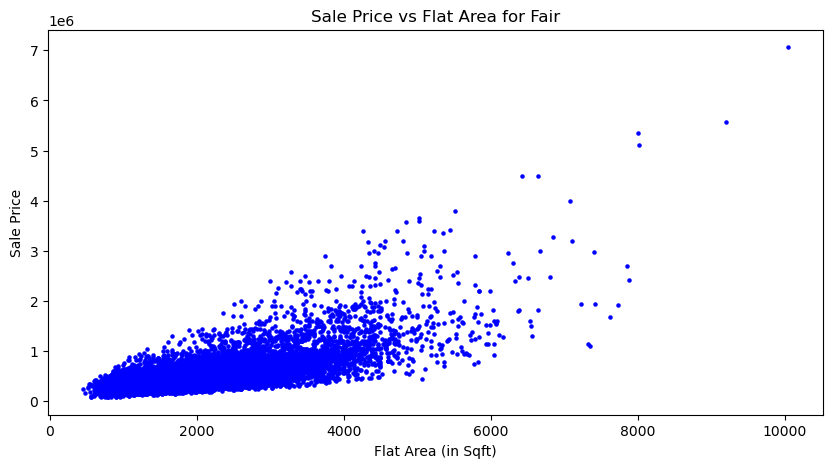

In [21]:
def plot_scatter_chart(df, quality):
    quality_data = df[df['Condition of the House'] == quality]
    plt.figure(figsize=(10, 5))    
    plt.scatter(quality_data['Flat Area (in Sqft)'], quality_data['Sale Price'], color='blue', s=5)    
    plt.xlabel("Flat Area (in Sqft)")
    plt.ylabel("Sale Price")
    plt.title(f"Sale Price vs Flat Area for {quality}")    
    plt.show()
plot_scatter_chart(df4, 'Fair')

In [22]:
rank_mapping = {
    'Excellent': 1,
    'Good': 2,
    'Okay': 3,
    'Fair': 4,
    'Bad': 5
}
df4['Condition_encoded'] = df4['Condition of the House'].replace(rank_mapping)
df4.drop('Condition of the House', axis=1, inplace=True)
df4.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft),price_per_sqft,Condition_encoded
0,221900.0,3,1,1180.0,1.0,7,63,5650,188.050847,4
1,538000.0,3,2,2570.0,2.0,7,67,7639,209.338521,4
2,180000.0,2,1,770.0,1.0,6,85,8062,233.766234,4
3,604000.0,4,3,1960.0,1.0,7,53,5000,308.163265,1
4,510000.0,3,2,1680.0,1.0,8,31,7503,303.571429,4


In [23]:
def remove_pps_outliers(df, threshold=0.5):
    df_out = pd.DataFrame()    
    for key, subdf in df4.groupby('Condition_encoded'):
        m = subdf['price_per_sqft'].mean()
        st = subdf['price_per_sqft'].std()
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - threshold*st)) & (subdf['price_per_sqft'] <= (m + threshold*st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)    
    return df_out
df4['price_per_sqft'] = df4['Sale Price'] / df4['Flat Area (in Sqft)']
df5 = remove_pps_outliers(df4)
print(df5.shape)

(8425, 10)


In [24]:
df5 = df5.drop(['price_per_sqft'],axis='columns')
df5.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft),Condition_encoded
0,604000.0,4,3,1960.0,1.0,7,53,5000,1
1,822500.0,5,3,2320.0,2.0,7,92,4960,1
2,371500.0,3,2,1370.0,1.0,7,54,7288,1
3,390000.0,3,2,1250.0,1.0,7,76,7392,1
4,550000.0,3,2,1970.0,2.0,8,89,4166,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
X = df5.drop('Sale Price', axis=1)
y = df5['Sale Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('Model Score:', score)

Model Score: 0.9081542389763398


In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91173345, 0.91300787, 0.91359627, 0.91163064, 0.91015565])

In [27]:
new_house_features = [[3, 1, 1430.0, 1.0, 7, 63, 11659, 5]]
predicted_price = model.predict(new_house_features)
print("Predicted price:", predicted_price)

Predicted price: [333534.01372213]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
df5.tail()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Overall Grade,Age of House (in Years),Lot Area after Renovation (in Sqft),Condition_encoded
8420,125000.0,1,1,500.0,1.0,5,90,7440,5
8421,305000.0,2,1,910.0,1.0,6,92,14566,5
8422,235000.0,2,1,900.0,1.0,6,90,7200,5
8423,427000.0,4,1,1860.0,1.5,7,117,4000,5
8424,380000.0,3,1,1430.0,1.0,7,63,11659,5
